# import library yang dibutuhkan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Matplotlib is building the font cache; this may take a moment.


# MEMBACA DATA SET

In [5]:
df = pd.read_csv('Mall_Customers.csv')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# PERSIAPAN DATASET


In [9]:
df.rename(index=str, columns={
    'Annual Income (k$)' : 'Income',
    'Spending Score (1-100)' : 'Score'
}, inplace=True)

In [10]:
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [11]:
print(X)

     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


# MENENTUKAN JUMLAH CLASTER DENGAN ELBOW

Text(5, 150000, 'Possible elbow point')

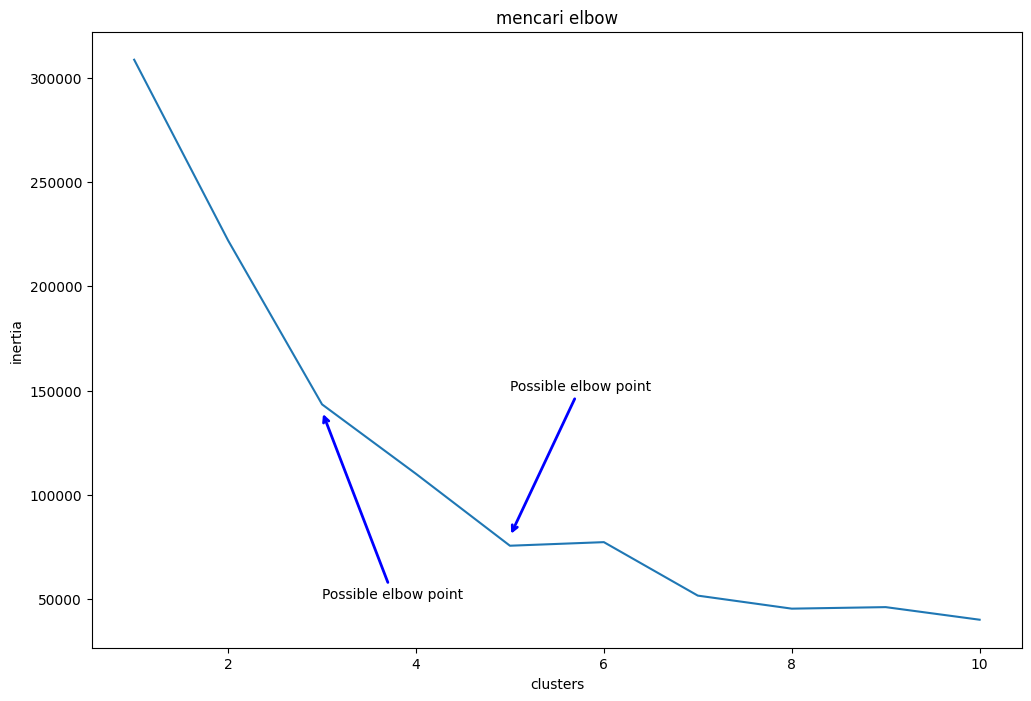

In [15]:
 clusters =[]
 for i in range(1,11):
     km =KMeans(n_clusters=i).fit(X)
     clusters.append(km.inertia_)
     
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

#panah elbow
ax.annotate('Possible elbow point', xy=(3,140000), xytext=(3,50000),xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible elbow point', xy=(5,80000), xytext=(5,150000),xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

# PROSES CLUSTERING

In [16]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

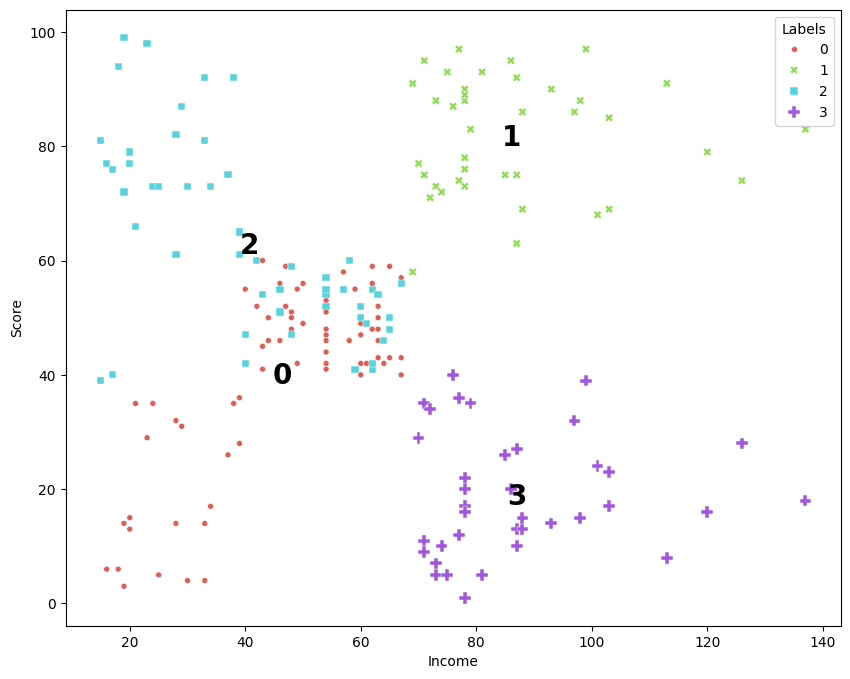

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], style=X['Labels'], size=X['Labels'], palette=sns.color_palette('hls', n_clust))

for label in X['Labels'].unique():  # Gunakan unique() untuk menghindari duplikasi
    plt.annotate(label,
                 (X[X['Labels'] == label]['Income'].mean(),
                  X[X['Labels'] == label]['Score'].mean()),
                  horizontalalignment='center',
                  verticalalignment='center',
                  size=20, weight='bold',
                  color='black')


In [19]:
print(X)

     Age  Income  Score  Labels
0     19      15     39       2
1     21      15     81       2
2     20      16      6       0
3     23      16     77       2
4     31      17     40       2
..   ...     ...    ...     ...
195   35     120     79       1
196   45     126     28       3
197   32     126     74       1
198   32     137     18       3
199   30     137     83       1

[200 rows x 4 columns]


In [21]:
X.to_excel("output_cluster.xlsx")